In [1]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
#Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3D plots 
#import seaborn as sns
#sklearn
from sklearn.cluster import AgglomerativeClustering #Heirarchial Clustering
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.metrics import mean_squared_error, r2_score
#from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.model_selection import train_test_split #split data into training and test sets
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy.cluster.hierarchy import dendrogram
from sklearn import decomposition
from sklearn import datasets
from sklearn import tree 
from scipy.stats import pearsonr
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [2]:
url = "/Users/zacblackburn/Desktop/data.csv"

In [3]:
url

'/Users/zacblackburn/Desktop/data.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df

,datetime,dhi,dni,ghi,temp_dew,wind_speed,relative_humidity,temp_air,power
0,2019-01-01 00:00:00-06:00,0.0,0.0,0.0,295.840,1.558,100.536,280.860,0.0
1,2019-01-01 01:00:00-06:00,0.0,0.0,0.0,275.053,1.366,106.743,210.052,0.0
2,2019-01-01 02:00:00-06:00,0.0,0.0,0.0,224.428,1.818,109.262,269.435,0.0
3,2019-01-01 03:00:00-06:00,0.0,0.0,0.0,270.828,2.459,104.263,245.328,0.0
4,2019-01-01 04:00:00-06:00,0.0,0.0,0.0,262.859,2.718,114.725,337.065,0.0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00-06:00,0.0,0.0,0.0,269.305,1.429,86.873,272.529,0.0
8756,2019-12-31 20:00:00-06:00,0.0,0.0,0.0,0.000,1.565,126.776,285.623,0.0
8757,2019-12-31 21:00:00-06:00,0.0,0.0,0.0,293.454,1.388,124.929,244.140,0.0
8758,2019-12-31 22:00:00-06:00,0.0,0.0,0.0,259.727,1.201,104.666,283.043,0.0


In [6]:
df.dtypes

datetime              object
dhi                  float64
dni                  float64
ghi                  float64
temp_dew             float64
wind_speed           float64
relative_humidity    float64
temp_air             float64
power                float64
dtype: object

In [7]:
import datetime as datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.dtypes

datetime             datetime64[ns, pytz.FixedOffset(-360)]
dhi                                                 float64
dni                                                 float64
ghi                                                 float64
temp_dew                                            float64
wind_speed                                          float64
relative_humidity                                   float64
temp_air                                            float64
power                                               float64
dtype: object

In [9]:
df

,datetime,dhi,dni,ghi,temp_dew,wind_speed,relative_humidity,temp_air,power
0,2019-01-01 00:00:00-06:00,0.0,0.0,0.0,295.840,1.558,100.536,280.860,0.0
1,2019-01-01 01:00:00-06:00,0.0,0.0,0.0,275.053,1.366,106.743,210.052,0.0
2,2019-01-01 02:00:00-06:00,0.0,0.0,0.0,224.428,1.818,109.262,269.435,0.0
3,2019-01-01 03:00:00-06:00,0.0,0.0,0.0,270.828,2.459,104.263,245.328,0.0
4,2019-01-01 04:00:00-06:00,0.0,0.0,0.0,262.859,2.718,114.725,337.065,0.0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00-06:00,0.0,0.0,0.0,269.305,1.429,86.873,272.529,0.0
8756,2019-12-31 20:00:00-06:00,0.0,0.0,0.0,0.000,1.565,126.776,285.623,0.0
8757,2019-12-31 21:00:00-06:00,0.0,0.0,0.0,293.454,1.388,124.929,244.140,0.0
8758,2019-12-31 22:00:00-06:00,0.0,0.0,0.0,259.727,1.201,104.666,283.043,0.0


In [10]:
df_kmeans = KMeans(n_clusters=365, init='k-means++', n_init=5, max_iter=300, 
                     tol=0.0001).fit(df[['dhi', 'dni', 'ghi', 'temp_dew', 'wind_speed' ,'relative_humidity', 'temp_air', 'power']]) #n_clusters - number of clusters
print(df_kmeans.inertia_)
df_kmeans_centroids = pd.DataFrame(df_kmeans.cluster_centers_, columns = ['dhi', 'dni', 'ghi', 'temp_dew', 'wind_speed', 'relative_humidity', 'temp_air', 'power']) 



18242481.35795885


In [11]:
df_kmeans

KMeans(n_clusters=365, n_init=5)

In [12]:
df_kmeans_centroids

,dhi,dni,ghi,temp_dew,wind_speed,relative_humidity,temp_air,power
0,0.492383,0.575891,0.461813,256.273234,1.931234,88.143477,236.048656,0.008680
1,241.749000,599.589667,624.371833,327.074000,2.868500,35.971667,311.889667,130.500833
2,254.599233,141.736667,343.094700,295.533667,3.089467,64.261467,307.478367,64.481267
3,42.120533,693.321667,219.423667,245.098400,2.091133,61.108667,275.372533,34.719733
4,79.192400,905.512000,1000.871600,257.949000,2.214400,39.973500,309.277600,160.438400
...,...,...,...,...,...,...,...,...
360,70.118000,598.304500,255.748667,297.314167,2.272000,49.714167,0.000000,68.021500
361,141.433375,839.691187,824.912688,272.332688,2.318125,46.849000,318.466563,154.885437
362,88.423667,823.455889,526.975000,298.038444,2.950000,43.840222,274.220667,23.669778
363,463.693500,0.000000,716.675500,320.518000,4.896500,47.391500,315.374500,129.762000


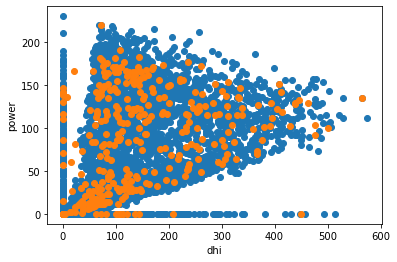

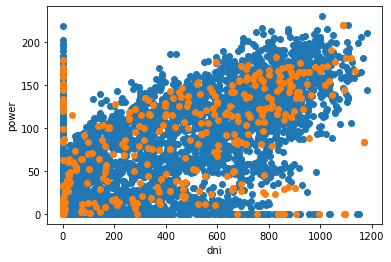

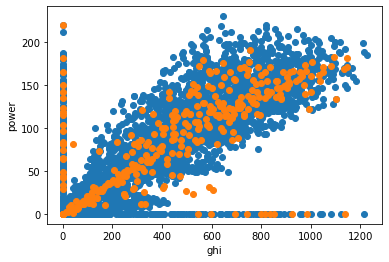

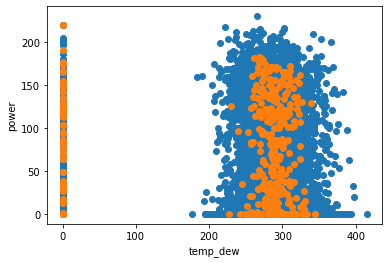

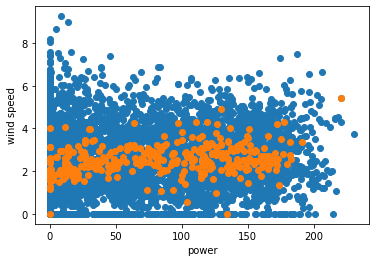

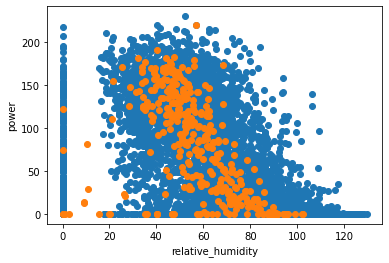

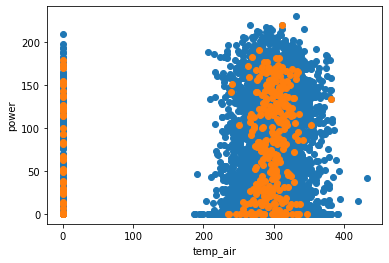

In [13]:
plt.scatter(df['dhi'], df['power'])
plt.scatter(df_kmeans_centroids['dhi'], df_kmeans_centroids['power'])
plt.xlabel('dhi')
plt.ylabel('power')
plt.show()

plt.scatter(df['dni'], df['power'])
plt.scatter(df_kmeans_centroids['dni'], df_kmeans_centroids['power'])
plt.xlabel('dni')
plt.ylabel('power')
plt.show()

plt.scatter(df['ghi'], df['power'])
plt.scatter(df_kmeans_centroids['ghi'], df_kmeans_centroids['power'])
plt.xlabel('ghi')
plt.ylabel('power')
plt.show()

plt.scatter(df['temp_dew'], df['power'])
plt.scatter(df_kmeans_centroids['temp_dew'], df_kmeans_centroids['power'])
plt.xlabel('temp_dew')
plt.ylabel('power')
plt.show()

plt.scatter(df['power'], df['wind_speed'])
plt.scatter(df_kmeans_centroids['power'], df_kmeans_centroids['wind_speed'])
plt.xlabel('power')
plt.ylabel('wind speed')
plt.show()

plt.scatter(df['relative_humidity'], df['power'])
plt.scatter(df_kmeans_centroids['relative_humidity'], df_kmeans_centroids['power'])
plt.xlabel('relative_humidity')
plt.ylabel('power')
plt.show()

plt.scatter(df['temp_air'], df['power'])
plt.scatter(df_kmeans_centroids['temp_air'], df_kmeans_centroids['power'])
plt.xlabel('temp_air')
plt.ylabel('power')
plt.show()

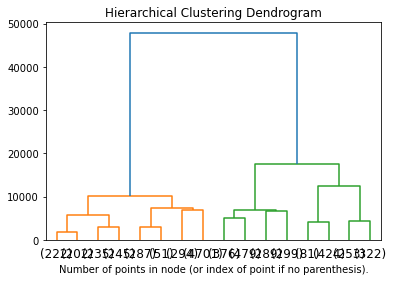

In [14]:
X = df[['dhi', 'dni', 'ghi', 'temp_dew', 'wind_speed', 'relative_humidity', 'temp_air',]]
 
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
                                     
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [15]:
january1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'dni']
january2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'dni']
january3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'dni']
january4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'dni']
january5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'dni']
january6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'dni']
january7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'dni']
january8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'dni']
january9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'dni']
january10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'dni']
january11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'dni']
january12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'dni']
january13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'dni']
january14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'dni']
january15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'dni']
january16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'dni']
january17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'dni']
january18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'dni']
january19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'dni']
january20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'dni']
january21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'dni']
january22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'dni']
january23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'dni']
january24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'dni']
january25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'dni']
january26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'dni']
january27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'dni']
january28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'dni']
january29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'dni']
january30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'dni']
january31_dni = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'dni']

february1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'dni']
february2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'dni']
february3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'dni']
february4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'dni']
february5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'dni']
february6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'dni']
february7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'dni']
february8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'dni']
february9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'dni']
february10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'dni']
february11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'dni']
february12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'dni']
february13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'dni']
february14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'dni']
february15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'dni']
february16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'dni']
february17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'dni']
february18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'dni']
february19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'dni']
february20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'dni']
february21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'dni']
february22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'dni']
february23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'dni']
february24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'dni']
february25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'dni']
february26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'dni']
february27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'dni']
february28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'dni']


march1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'dni']
march2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'dni']
march3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'dni']
march4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'dni']
march5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'dni']
march6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'dni']
march7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'dni']
march8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'dni']
march9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'dni']
march10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'dni']
march11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'dni']
march12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'dni']
march13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'dni']
march14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'dni']
march15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'dni']
march16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'dni']
march17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'dni']
march18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'dni']
march19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'dni']
march20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'dni']
march21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'dni']
march22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'dni']
march23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'dni']
march24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'dni']
march25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'dni']
march26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'dni']
march27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'dni']
march28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'dni']
march29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'dni']
march30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'dni']
march31_dni = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'dni']

april1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'dni']
april2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'dni']
april3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'dni']
april4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'dni']
april5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'dni']
april6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'dni']
april7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'dni']
april8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'dni']
april9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'dni']
april10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'dni']
april11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'dni']
april12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'dni']
april13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'dni']
april14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'dni']
april15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'dni']
april16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'dni']
april17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'dni']
april18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'dni']
april19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'dni']
april20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'dni']
april21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'dni']
april22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'dni']
april23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'dni']
april24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'dni']
april25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'dni']
april26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'dni']
april27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'dni']
april28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'dni']
april29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'dni']
april30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'dni']

may1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'dni']
may2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'dni']
may3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'dni']
may4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'dni']
may5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'dni']
may6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'dni']
may7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'dni']
may8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'dni']
may9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'dni']
may10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'dni']
may11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'dni']
may12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'dni']
may13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'dni']
may14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'dni']
may15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'dni']
may16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'dni']
may17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'dni']
may18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'dni']
may19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'dni']
may20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'dni']
may21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'dni']
may22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'dni']
may23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'dni']
may24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'dni']
may25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'dni']
may26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'dni']
may27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'dni']
may28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'dni']
may29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'dni']
may30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'dni']
may31_dni = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'dni']

june1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'dni']
june2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'dni']
june3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'dni']
june4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'dni']
june5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'dni']
june6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'dni']
june7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'dni']
june8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'dni']
june9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'dni']
june10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'dni']
june11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'dni']
june12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'dni']
june13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'dni']
june14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'dni']
june15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'dni']
june16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'dni']
june17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'dni']
june18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'dni']
june19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'dni']
june20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'dni']
june21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'dni']
june22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'dni']
june23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'dni']
june24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'dni']
june25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'dni']
june26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'dni']
june27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'dni']
june28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'dni']
june29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'dni']
june30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'dni']

july1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'dni']
july2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'dni']
july3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'dni']
july4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'dni']
july5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'dni']
july6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'dni']
july7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'dni']
july8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'dni']
july9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'dni']
july10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'dni']
july11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'dni']
july12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'dni']
july13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'dni']
july14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'dni']
july15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'dni']
july16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'dni']
july17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'dni']
july18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'dni']
july19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'dni']
july20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'dni']
july21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'dni']
july22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'dni']
july23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'dni']
july24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'dni']
july25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'dni']
july26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'dni']
july27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'dni']
july28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'dni']
july29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'dni']
july30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'dni']
july31_dni = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'dni']

august1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'dni']
august2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'dni']
august3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'dni']
august4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'dni']
august5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'dni']
august6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'dni']
august7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'dni']
august8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'dni']
august9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'dni']
august10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'dni']
august11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'dni']
august12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'dni']
august13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'dni']
august14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'dni']
august15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'dni']
august16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'dni']
august17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'dni']
august18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'dni']
august19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'dni']
august20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'dni']
august21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'dni']
august22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'dni']
august23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'dni']
august24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'dni']
august25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'dni']
august26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'dni']
august27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'dni']
august28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'dni']
august29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'dni']
august30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'dni']
august31_dni = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'dni']

september1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'dni']
september2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'dni']
september3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'dni']
september4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'dni']
september5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'dni']
september6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'dni']
september7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'dni']
september8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'dni']
september9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'dni']
september10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'dni']
september11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'dni']
september12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'dni']
september13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'dni']
september14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'dni']
september15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'dni']
september16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'dni']
september17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'dni']
september18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'dni']
september19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'dni']
september20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'dni']
september21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'dni']
september22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'dni']
september23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'dni']
september24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'dni']
september25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'dni']
september26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'dni']
september27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'dni']
september28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'dni']
september29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'dni']
september30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'dni']

october1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'dni']
october2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'dni']
october3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'dni']
october4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'dni']
october5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'dni']
october6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'dni']
october7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'dni']
october8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'dni']
october9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'dni']
october10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'dni']
october11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'dni']
october12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'dni']
october13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'dni']
october14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'dni']
october15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'dni']
october16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'dni']
october17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'dni']
october18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'dni']
october19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'dni']
october20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'dni']
october21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'dni']
october22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'dni']
october23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'dni']
october24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'dni']
october25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'dni']
october26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'dni']
october27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'dni']
october28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'dni']
october29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'dni']
october30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'dni']
october31_dni = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'dni']

november1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'dni']
november2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'dni']
november3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'dni']
november4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'dni']
november5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'dni']
november6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'dni']
november7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'dni']
november8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'dni']
november9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'dni']
november10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'dni']
november11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'dni']
november12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'dni']
november13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'dni']
november14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'dni']
november15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'dni']
november16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'dni']
november17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'dni']
november18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'dni']
november19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'dni']
november20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'dni']
november21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'dni']
november22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'dni']
november23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'dni']
november24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'dni']
november25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'dni']
november26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'dni']
november27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'dni']
november28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'dni']
november29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'dni']
november30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'dni']

december1_dni = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'dni']
december2_dni = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'dni']
december3_dni = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'dni']
december4_dni = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'dni']
december5_dni = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'dni']
december6_dni = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'dni']
december7_dni = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'dni']
december8_dni = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'dni']
december9_dni = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'dni']
december10_dni = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'dni']
december11_dni = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'dni']
december12_dni = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'dni']
december13_dni = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'dni']
december14_dni = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'dni']
december15_dni = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'dni']
december16_dni = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'dni']
december17_dni = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'dni']
december18_dni = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'dni']
december19_dni = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'dni']
december20_dni = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'dni']
december21_dni = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'dni']
december22_dni = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'dni']
december23_dni = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'dni']
december24_dni = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'dni']
december25_dni = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'dni']
december26_dni = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'dni']
december27_dni = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'dni']
december28_dni = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'dni']
december29_dni = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'dni']
december30_dni = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'dni']
december31_dni = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'dni']

In [16]:
january1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'dhi']
january2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'dhi']
january3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'dhi']
january4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'dhi']
january5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'dhi']
january6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'dhi']
january7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'dhi']
january8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'dhi']
january9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'dhi']
january10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'dhi']
january11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'dhi']
january12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'dhi']
january13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'dhi']
january14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'dhi']
january15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'dhi']
january16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'dhi']
january17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'dhi']
january18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'dhi']
january19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'dhi']
january20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'dhi']
january21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'dhi']
january22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'dhi']
january23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'dhi']
january24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'dhi']
january25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'dhi']
january26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'dhi']
january27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'dhi']
january28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'dhi']
january29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'dhi']
january30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'dhi']
january31_dhi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'dhi']

february1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'dhi']
february2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'dhi']
february3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'dhi']
february4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'dhi']
february5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'dhi']
february6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'dhi']
february7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'dhi']
february8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'dhi']
february9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'dhi']
february10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'dhi']
february11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'dhi']
february12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'dhi']
february13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'dhi']
february14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'dhi']
february15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'dhi']
february16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'dhi']
february17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'dhi']
february18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'dhi']
february19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'dhi']
february20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'dhi']
february21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'dhi']
february22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'dhi']
february23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'dhi']
february24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'dhi']
february25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'dhi']
february26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'dhi']
february27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'dhi']
february28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'dhi']


march1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'dhi']
march2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'dhi']
march3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'dhi']
march4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'dhi']
march5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'dhi']
march6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'dhi']
march7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'dhi']
march8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'dhi']
march9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'dhi']
march10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'dhi']
march11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'dhi']
march12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'dhi']
march13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'dhi']
march14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'dhi']
march15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'dhi']
march16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'dhi']
march17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'dhi']
march18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'dhi']
march19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'dhi']
march20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'dhi']
march21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'dhi']
march22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'dhi']
march23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'dhi']
march24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'dhi']
march25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'dhi']
march26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'dhi']
march27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'dhi']
march28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'dhi']
march29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'dhi']
march30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'dhi']
march31_dhi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'dhi']

april1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'dhi']
april2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'dhi']
april3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'dhi']
april4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'dhi']
april5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'dhi']
april6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'dhi']
april7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'dhi']
april8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'dhi']
april9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'dhi']
april10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'dhi']
april11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'dhi']
april12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'dhi']
april13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'dhi']
april14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'dhi']
april15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'dhi']
april16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'dhi']
april17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'dhi']
april18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'dhi']
april19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'dhi']
april20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'dhi']
april21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'dhi']
april22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'dhi']
april23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'dhi']
april24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'dhi']
april25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'dhi']
april26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'dhi']
april27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'dhi']
april28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'dhi']
april29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'dhi']
april30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'dhi']

may1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'dhi']
may2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'dhi']
may3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'dhi']
may4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'dhi']
may5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'dhi']
may6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'dhi']
may7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'dhi']
may8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'dhi']
may9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'dhi']
may10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'dhi']
may11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'dhi']
may12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'dhi']
may13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'dhi']
may14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'dhi']
may15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'dhi']
may16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'dhi']
may17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'dhi']
may18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'dhi']
may19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'dhi']
may20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'dhi']
may21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'dhi']
may22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'dhi']
may23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'dhi']
may24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'dhi']
may25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'dhi']
may26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'dhi']
may27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'dhi']
may28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'dhi']
may29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'dhi']
may30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'dhi']
may31_dhi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'dhi']

june1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'dhi']
june2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'dhi']
june3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'dhi']
june4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'dhi']
june5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'dhi']
june6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'dhi']
june7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'dhi']
june8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'dhi']
june9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'dhi']
june10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'dhi']
june11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'dhi']
june12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'dhi']
june13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'dhi']
june14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'dhi']
june15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'dhi']
june16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'dhi']
june17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'dhi']
june18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'dhi']
june19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'dhi']
june20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'dhi']
june21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'dhi']
june22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'dhi']
june23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'dhi']
june24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'dhi']
june25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'dhi']
june26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'dhi']
june27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'dhi']
june28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'dhi']
june29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'dhi']
june30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'dhi']

july1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'dhi']
july2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'dhi']
july3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'dhi']
july4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'dhi']
july5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'dhi']
july6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'dhi']
july7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'dhi']
july8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'dhi']
july9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'dhi']
july10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'dhi']
july11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'dhi']
july12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'dhi']
july13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'dhi']
july14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'dhi']
july15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'dhi']
july16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'dhi']
july17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'dhi']
july18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'dhi']
july19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'dhi']
july20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'dhi']
july21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'dhi']
july22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'dhi']
july23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'dhi']
july24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'dhi']
july25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'dhi']
july26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'dhi']
july27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'dhi']
july28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'dhi']
july29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'dhi']
july30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'dhi']
july31_dhi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'dhi']

august1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'dhi']
august2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'dhi']
august3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'dhi']
august4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'dhi']
august5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'dhi']
august6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'dhi']
august7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'dhi']
august8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'dhi']
august9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'dhi']
august10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'dhi']
august11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'dhi']
august12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'dhi']
august13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'dhi']
august14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'dhi']
august15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'dhi']
august16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'dhi']
august17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'dhi']
august18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'dhi']
august19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'dhi']
august20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'dhi']
august21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'dhi']
august22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'dhi']
august23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'dhi']
august24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'dhi']
august25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'dhi']
august26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'dhi']
august27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'dhi']
august28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'dhi']
august29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'dhi']
august30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'dhi']
august31_dhi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'dhi']

september1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'dhi']
september2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'dhi']
september3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'dhi']
september4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'dhi']
september5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'dhi']
september6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'dhi']
september7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'dhi']
september8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'dhi']
september9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'dhi']
september10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'dhi']
september11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'dhi']
september12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'dhi']
september13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'dhi']
september14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'dhi']
september15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'dhi']
september16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'dhi']
september17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'dhi']
september18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'dhi']
september19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'dhi']
september20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'dhi']
september21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'dhi']
september22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'dhi']
september23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'dhi']
september24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'dhi']
september25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'dhi']
september26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'dhi']
september27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'dhi']
september28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'dhi']
september29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'dhi']
september30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'dhi']

october1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'dhi']
october2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'dhi']
october3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'dhi']
october4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'dhi']
october5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'dhi']
october6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'dhi']
october7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'dhi']
october8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'dhi']
october9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'dhi']
october10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'dhi']
october11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'dhi']
october12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'dhi']
october13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'dhi']
october14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'dhi']
october15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'dhi']
october16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'dhi']
october17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'dhi']
october18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'dhi']
october19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'dhi']
october20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'dhi']
october21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'dhi']
october22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'dhi']
october23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'dhi']
october24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'dhi']
october25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'dhi']
october26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'dhi']
october27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'dhi']
october28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'dhi']
october29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'dhi']
october30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'dhi']
october31_dhi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'dhi']

november1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'dhi']
november2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'dhi']
november3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'dhi']
november4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'dhi']
november5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'dhi']
november6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'dhi']
november7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'dhi']
november8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'dhi']
november9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'dhi']
november10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'dhi']
november11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'dhi']
november12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'dhi']
november13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'dhi']
november14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'dhi']
november15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'dhi']
november16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'dhi']
november17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'dhi']
november18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'dhi']
november19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'dhi']
november20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'dhi']
november21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'dhi']
november22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'dhi']
november23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'dhi']
november24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'dhi']
november25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'dhi']
november26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'dhi']
november27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'dhi']
november28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'dhi']
november29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'dhi']
november30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'dhi']

december1_dhi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'dhi']
december2_dhi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'dhi']
december3_dhi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'dhi']
december4_dhi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'dhi']
december5_dhi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'dhi']
december6_dhi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'dhi']
december7_dhi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'dhi']
december8_dhi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'dhi']
december9_dhi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'dhi']
december10_dhi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'dhi']
december11_dhi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'dhi']
december12_dhi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'dhi']
december13_dhi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'dhi']
december14_dhi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'dhi']
december15_dhi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'dhi']
december16_dhi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'dhi']
december17_dhi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'dhi']
december18_dhi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'dhi']
december19_dhi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'dhi']
december20_dhi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'dhi']
december21_dhi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'dhi']
december22_dhi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'dhi']
december23_dhi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'dhi']
december24_dhi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'dhi']
december25_dhi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'dhi']
december26_dhi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'dhi']
december27_dhi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'dhi']
december28_dhi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'dhi']
december29_dhi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'dhi']
december30_dhi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'dhi']
december31_dhi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'dhi']


In [17]:
january1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'ghi']
january2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'ghi']
january3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'ghi']
january4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'ghi']
january5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'ghi']
january6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'ghi']
january7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'ghi']
january8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'ghi']
january9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'ghi']
january10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'ghi']
january11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'ghi']
january12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'ghi']
january13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'ghi']
january14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'ghi']
january15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'ghi']
january16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'ghi']
january17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'ghi']
january18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'ghi']
january19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'ghi']
january20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'ghi']
january21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'ghi']
january22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'ghi']
january23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'ghi']
january24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'ghi']
january25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'ghi']
january26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'ghi']
january27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'ghi']
january28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'ghi']
january29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'ghi']
january30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'ghi']
january31_ghi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'ghi']

february1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'ghi']
february2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'ghi']
february3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'ghi']
february4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'ghi']
february5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'ghi']
february6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'ghi']
february7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'ghi']
february8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'ghi']
february9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'ghi']
february10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'ghi']
february11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'ghi']
february12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'ghi']
february13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'ghi']
february14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'ghi']
february15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'ghi']
february16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'ghi']
february17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'ghi']
february18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'ghi']
february19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'ghi']
february20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'ghi']
february21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'ghi']
february22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'ghi']
february23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'ghi']
february24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'ghi']
february25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'ghi']
february26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'ghi']
february27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'ghi']
february28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'ghi']


march1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'ghi']
march2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'ghi']
march3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'ghi']
march4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'ghi']
march5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'ghi']
march6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'ghi']
march7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'ghi']
march8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'ghi']
march9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'ghi']
march10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'ghi']
march11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'ghi']
march12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'ghi']
march13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'ghi']
march14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'ghi']
march15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'ghi']
march16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'ghi']
march17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'ghi']
march18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'ghi']
march19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'ghi']
march20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'ghi']
march21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'ghi']
march22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'ghi']
march23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'ghi']
march24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'ghi']
march25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'ghi']
march26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'ghi']
march27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'ghi']
march28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'ghi']
march29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'ghi']
march30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'ghi']
march31_ghi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'ghi']

april1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'ghi']
april2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'ghi']
april3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'ghi']
april4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'ghi']
april5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'ghi']
april6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'ghi']
april7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'ghi']
april8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'ghi']
april9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'ghi']
april10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'ghi']
april11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'ghi']
april12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'ghi']
april13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'ghi']
april14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'ghi']
april15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'ghi']
april16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'ghi']
april17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'ghi']
april18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'ghi']
april19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'ghi']
april20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'ghi']
april21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'ghi']
april22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'ghi']
april23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'ghi']
april24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'ghi']
april25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'ghi']
april26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'ghi']
april27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'ghi']
april28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'ghi']
april29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'ghi']
april30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'ghi']

may1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'ghi']
may2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'ghi']
may3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'ghi']
may4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'ghi']
may5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'ghi']
may6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'ghi']
may7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'ghi']
may8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'ghi']
may9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'ghi']
may10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'ghi']
may11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'ghi']
may12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'ghi']
may13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'ghi']
may14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'ghi']
may15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'ghi']
may16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'ghi']
may17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'ghi']
may18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'ghi']
may19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'ghi']
may20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'ghi']
may21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'ghi']
may22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'ghi']
may23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'ghi']
may24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'ghi']
may25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'ghi']
may26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'ghi']
may27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'ghi']
may28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'ghi']
may29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'ghi']
may30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'ghi']
may31_ghi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'ghi']

june1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'ghi']
june2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'ghi']
june3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'ghi']
june4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'ghi']
june5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'ghi']
june6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'ghi']
june7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'ghi']
june8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'ghi']
june9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'ghi']
june10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'ghi']
june11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'ghi']
june12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'ghi']
june13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'ghi']
june14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'ghi']
june15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'ghi']
june16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'ghi']
june17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'ghi']
june18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'ghi']
june19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'ghi']
june20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'ghi']
june21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'ghi']
june22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'ghi']
june23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'ghi']
june24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'ghi']
june25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'ghi']
june26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'ghi']
june27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'ghi']
june28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'ghi']
june29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'ghi']
june30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'ghi']

july1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'ghi']
july2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'ghi']
july3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'ghi']
july4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'ghi']
july5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'ghi']
july6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'ghi']
july7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'ghi']
july8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'ghi']
july9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'ghi']
july10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'ghi']
july11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'ghi']
july12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'ghi']
july13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'ghi']
july14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'ghi']
july15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'ghi']
july16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'ghi']
july17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'ghi']
july18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'ghi']
july19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'ghi']
july20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'ghi']
july21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'ghi']
july22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'ghi']
july23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'ghi']
july24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'ghi']
july25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'ghi']
july26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'ghi']
july27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'ghi']
july28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'ghi']
july29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'ghi']
july30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'ghi']
july31_ghi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'ghi']

august1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'ghi']
august2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'ghi']
august3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'ghi']
august4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'ghi']
august5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'ghi']
august6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'ghi']
august7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'ghi']
august8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'ghi']
august9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'ghi']
august10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'ghi']
august11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'ghi']
august12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'ghi']
august13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'ghi']
august14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'ghi']
august15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'ghi']
august16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'ghi']
august17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'ghi']
august18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'ghi']
august19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'ghi']
august20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'ghi']
august21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'ghi']
august22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'ghi']
august23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'ghi']
august24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'ghi']
august25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'ghi']
august26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'ghi']
august27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'ghi']
august28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'ghi']
august29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'ghi']
august30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'ghi']
august31_ghi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'ghi']

september1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'ghi']
september2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'ghi']
september3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'ghi']
september4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'ghi']
september5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'ghi']
september6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'ghi']
september7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'ghi']
september8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'ghi']
september9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'ghi']
september10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'ghi']
september11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'ghi']
september12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'ghi']
september13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'ghi']
september14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'ghi']
september15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'ghi']
september16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'ghi']
september17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'ghi']
september18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'ghi']
september19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'ghi']
september20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'ghi']
september21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'ghi']
september22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'ghi']
september23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'ghi']
september24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'ghi']
september25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'ghi']
september26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'ghi']
september27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'ghi']
september28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'ghi']
september29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'ghi']
september30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'ghi']

october1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'ghi']
october2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'ghi']
october3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'ghi']
october4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'ghi']
october5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'ghi']
october6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'ghi']
october7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'ghi']
october8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'ghi']
october9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'ghi']
october10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'ghi']
october11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'ghi']
october12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'ghi']
october13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'ghi']
october14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'ghi']
october15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'ghi']
october16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'ghi']
october17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'ghi']
october18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'ghi']
october19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'ghi']
october20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'ghi']
october21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'ghi']
october22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'ghi']
october23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'ghi']
october24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'ghi']
october25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'ghi']
october26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'ghi']
october27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'ghi']
october28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'ghi']
october29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'ghi']
october30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'ghi']
october31_ghi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'ghi']

november1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'ghi']
november2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'ghi']
november3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'ghi']
november4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'ghi']
november5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'ghi']
november6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'ghi']
november7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'ghi']
november8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'ghi']
november9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'ghi']
november10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'ghi']
november11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'ghi']
november12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'ghi']
november13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'ghi']
november14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'ghi']
november15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'ghi']
november16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'ghi']
november17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'ghi']
november18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'ghi']
november19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'ghi']
november20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'ghi']
november21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'ghi']
november22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'ghi']
november23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'ghi']
november24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'ghi']
november25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'ghi']
november26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'ghi']
november27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'ghi']
november28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'ghi']
november29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'ghi']
november30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'ghi']

december1_ghi = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'ghi']
december2_ghi = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'ghi']
december3_ghi = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'ghi']
december4_ghi = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'ghi']
december5_ghi = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'ghi']
december6_ghi = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'ghi']
december7_ghi = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'ghi']
december8_ghi = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'ghi']
december9_ghi = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'ghi']
december10_ghi = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'ghi']
december11_ghi = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'ghi']
december12_ghi = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'ghi']
december13_ghi = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'ghi']
december14_ghi = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'ghi']
december15_ghi = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'ghi']
december16_ghi = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'ghi']
december17_ghi = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'ghi']
december18_ghi = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'ghi']
december19_ghi = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'ghi']
december20_ghi = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'ghi']
december21_ghi = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'ghi']
december22_ghi = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'ghi']
december23_ghi = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'ghi']
december24_ghi = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'ghi']
december25_ghi = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'ghi']
december26_ghi = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'ghi']
december27_ghi = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'ghi']
december28_ghi = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'ghi']
december29_ghi = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'ghi']
december30_ghi = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'ghi']
december31_ghi = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'ghi']


In [18]:
january1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'temp_dew']
january2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'temp_dew']
january3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'temp_dew']
january4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'temp_dew']
january5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'temp_dew']
january6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'temp_dew']
january7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'temp_dew']
january8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'temp_dew']
january9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'temp_dew']
january10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'temp_dew']
january11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'temp_dew']
january12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'temp_dew']
january13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'temp_dew']
january14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'temp_dew']
january15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'temp_dew']
january16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'temp_dew']
january17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'temp_dew']
january18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'temp_dew']
january19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'temp_dew']
january20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'temp_dew']
january21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'temp_dew']
january22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'temp_dew']
january23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'temp_dew']
january24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'temp_dew']
january25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'temp_dew']
january26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'temp_dew']
january27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'temp_dew']
january28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'temp_dew']
january29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'temp_dew']
january30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'temp_dew']
january31_temp_dew = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'temp_dew']

february1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'temp_dew']
february2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'temp_dew']
february3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'temp_dew']
february4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'temp_dew']
february5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'temp_dew']
february6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'temp_dew']
february7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'temp_dew']
february8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'temp_dew']
february9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'temp_dew']
february10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'temp_dew']
february11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'temp_dew']
february12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'temp_dew']
february13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'temp_dew']
february14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'temp_dew']
february15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'temp_dew']
february16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'temp_dew']
february17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'temp_dew']
february18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'temp_dew']
february19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'temp_dew']
february20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'temp_dew']
february21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'temp_dew']
february22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'temp_dew']
february23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'temp_dew']
february24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'temp_dew']
february25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'temp_dew']
february26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'temp_dew']
february27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'temp_dew']
february28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'temp_dew']


march1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'temp_dew']
march2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'temp_dew']
march3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'temp_dew']
march4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'temp_dew']
march5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'temp_dew']
march6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'temp_dew']
march7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'temp_dew']
march8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'temp_dew']
march9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'temp_dew']
march10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'temp_dew']
march11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'temp_dew']
march12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'temp_dew']
march13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'temp_dew']
march14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'temp_dew']
march15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'temp_dew']
march16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'temp_dew']
march17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'temp_dew']
march18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'temp_dew']
march19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'temp_dew']
march20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'temp_dew']
march21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'temp_dew']
march22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'temp_dew']
march23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'temp_dew']
march24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'temp_dew']
march25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'temp_dew']
march26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'temp_dew']
march27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'temp_dew']
march28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'temp_dew']
march29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'temp_dew']
march30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'temp_dew']
march31_temp_dew = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'temp_dew']

april1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'temp_dew']
april2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'temp_dew']
april3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'temp_dew']
april4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'temp_dew']
april5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'temp_dew']
april6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'temp_dew']
april7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'temp_dew']
april8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'temp_dew']
april9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'temp_dew']
april10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'temp_dew']
april11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'temp_dew']
april12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'temp_dew']
april13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'temp_dew']
april14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'temp_dew']
april15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'temp_dew']
april16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'temp_dew']
april17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'temp_dew']
april18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'temp_dew']
april19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'temp_dew']
april20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'temp_dew']
april21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'temp_dew']
april22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'temp_dew']
april23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'temp_dew']
april24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'temp_dew']
april25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'temp_dew']
april26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'temp_dew']
april27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'temp_dew']
april28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'temp_dew']
april29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'temp_dew']
april30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'temp_dew']

may1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'temp_dew']
may2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'temp_dew']
may3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'temp_dew']
may4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'temp_dew']
may5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'temp_dew']
may6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'temp_dew']
may7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'temp_dew']
may8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'temp_dew']
may9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'temp_dew']
may10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'temp_dew']
may11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'temp_dew']
may12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'temp_dew']
may13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'temp_dew']
may14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'temp_dew']
may15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'temp_dew']
may16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'temp_dew']
may17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'temp_dew']
may18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'temp_dew']
may19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'temp_dew']
may20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'temp_dew']
may21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'temp_dew']
may22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'temp_dew']
may23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'temp_dew']
may24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'temp_dew']
may25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'temp_dew']
may26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'temp_dew']
may27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'temp_dew']
may28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'temp_dew']
may29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'temp_dew']
may30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'temp_dew']
may31_temp_dew = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'temp_dew']

june1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'temp_dew']
june2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'temp_dew']
june3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'temp_dew']
june4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'temp_dew']
june5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'temp_dew']
june6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'temp_dew']
june7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'temp_dew']
june8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'temp_dew']
june9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'temp_dew']
june10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'temp_dew']
june11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'temp_dew']
june12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'temp_dew']
june13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'temp_dew']
june14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'temp_dew']
june15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'temp_dew']
june16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'temp_dew']
june17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'temp_dew']
june18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'temp_dew']
june19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'temp_dew']
june20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'temp_dew']
june21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'temp_dew']
june22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'temp_dew']
june23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'temp_dew']
june24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'temp_dew']
june25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'temp_dew']
june26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'temp_dew']
june27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'temp_dew']
june28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'temp_dew']
june29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'temp_dew']
june30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'temp_dew']

july1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'temp_dew']
july2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'temp_dew']
july3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'temp_dew']
july4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'temp_dew']
july5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'temp_dew']
july6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'temp_dew']
july7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'temp_dew']
july8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'temp_dew']
july9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'temp_dew']
july10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'temp_dew']
july11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'temp_dew']
july12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'temp_dew']
july13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'temp_dew']
july14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'temp_dew']
july15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'temp_dew']
july16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'temp_dew']
july17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'temp_dew']
july18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'temp_dew']
july19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'temp_dew']
july20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'temp_dew']
july21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'temp_dew']
july22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'temp_dew']
july23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'temp_dew']
july24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'temp_dew']
july25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'temp_dew']
july26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'temp_dew']
july27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'temp_dew']
july28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'temp_dew']
july29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'temp_dew']
july30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'temp_dew']
july31_temp_dew = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'temp_dew']

august1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'temp_dew']
august2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'temp_dew']
august3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'temp_dew']
august4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'temp_dew']
august5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'temp_dew']
august6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'temp_dew']
august7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'temp_dew']
august8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'temp_dew']
august9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'temp_dew']
august10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'temp_dew']
august11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'temp_dew']
august12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'temp_dew']
august13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'temp_dew']
august14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'temp_dew']
august15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'temp_dew']
august16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'temp_dew']
august17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'temp_dew']
august18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'temp_dew']
august19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'temp_dew']
august20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'temp_dew']
august21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'temp_dew']
august22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'temp_dew']
august23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'temp_dew']
august24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'temp_dew']
august25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'temp_dew']
august26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'temp_dew']
august27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'temp_dew']
august28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'temp_dew']
august29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'temp_dew']
august30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'temp_dew']
august31_temp_dew = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'temp_dew']

september1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'temp_dew']
september2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'temp_dew']
september3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'temp_dew']
september4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'temp_dew']
september5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'temp_dew']
september6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'temp_dew']
september7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'temp_dew']
september8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'temp_dew']
september9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'temp_dew']
september10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'temp_dew']
september11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'temp_dew']
september12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'temp_dew']
september13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'temp_dew']
september14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'temp_dew']
september15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'temp_dew']
september16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'temp_dew']
september17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'temp_dew']
september18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'temp_dew']
september19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'temp_dew']
september20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'temp_dew']
september21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'temp_dew']
september22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'temp_dew']
september23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'temp_dew']
september24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'temp_dew']
september25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'temp_dew']
september26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'temp_dew']
september27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'temp_dew']
september28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'temp_dew']
september29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'temp_dew']
september30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'temp_dew']

october1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'temp_dew']
october2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'temp_dew']
october3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'temp_dew']
october4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'temp_dew']
october5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'temp_dew']
october6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'temp_dew']
october7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'temp_dew']
october8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'temp_dew']
october9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'temp_dew']
october10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'temp_dew']
october11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'temp_dew']
october12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'temp_dew']
october13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'temp_dew']
october14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'temp_dew']
october15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'temp_dew']
october16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'temp_dew']
october17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'temp_dew']
october18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'temp_dew']
october19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'temp_dew']
october20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'temp_dew']
october21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'temp_dew']
october22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'temp_dew']
october23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'temp_dew']
october24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'temp_dew']
october25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'temp_dew']
october26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'temp_dew']
october27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'temp_dew']
october28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'temp_dew']
october29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'temp_dew']
october30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'temp_dew']
october31_temp_dew = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'temp_dew']

november1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'temp_dew']
november2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'temp_dew']
november3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'temp_dew']
november4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'temp_dew']
november5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'temp_dew']
november6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'temp_dew']
november7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'temp_dew']
november8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'temp_dew']
november9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'temp_dew']
november10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'temp_dew']
november11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'temp_dew']
november12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'temp_dew']
november13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'temp_dew']
november14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'temp_dew']
november15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'temp_dew']
november16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'temp_dew']
november17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'temp_dew']
november18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'temp_dew']
november19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'temp_dew']
november20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'temp_dew']
november21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'temp_dew']
november22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'temp_dew']
november23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'temp_dew']
november24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'temp_dew']
november25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'temp_dew']
november26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'temp_dew']
november27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'temp_dew']
november28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'temp_dew']
november29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'temp_dew']
november30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'temp_dew']

december1_temp_dew = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'temp_dew']
december2_temp_dew = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'temp_dew']
december3_temp_dew = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'temp_dew']
december4_temp_dew = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'temp_dew']
december5_temp_dew = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'temp_dew']
december6_temp_dew = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'temp_dew']
december7_temp_dew = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'temp_dew']
december8_temp_dew = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'temp_dew']
december9_temp_dew = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'temp_dew']
december10_temp_dew = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'temp_dew']
december11_temp_dew = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'temp_dew']
december12_temp_dew = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'temp_dew']
december13_temp_dew = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'temp_dew']
december14_temp_dew = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'temp_dew']
december15_temp_dew = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'temp_dew']
december16_temp_dew = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'temp_dew']
december17_temp_dew = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'temp_dew']
december18_temp_dew = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'temp_dew']
december19_temp_dew = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'temp_dew']
december20_temp_dew = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'temp_dew']
december21_temp_dew = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'temp_dew']
december22_temp_dew = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'temp_dew']
december23_temp_dew = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'temp_dew']
december24_temp_dew = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'temp_dew']
december25_temp_dew = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'temp_dew']
december26_temp_dew = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'temp_dew']
december27_temp_dew = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'temp_dew']
december28_temp_dew = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'temp_dew']
december29_temp_dew = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'temp_dew']
december30_temp_dew = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'temp_dew']
december31_temp_dew = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'temp_dew']


In [19]:
january1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'wind_speed']
january2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'wind_speed']
january3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'wind_speed']
january4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'wind_speed']
january5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'wind_speed']
january6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'wind_speed']
january7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'wind_speed']
january8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'wind_speed']
january9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'wind_speed']
january10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'wind_speed']
january11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'wind_speed']
january12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'wind_speed']
january13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'wind_speed']
january14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'wind_speed']
january15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'wind_speed']
january16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'wind_speed']
january17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'wind_speed']
january18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'wind_speed']
january19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'wind_speed']
january20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'wind_speed']
january21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'wind_speed']
january22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'wind_speed']
january23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'wind_speed']
january24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'wind_speed']
january25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'wind_speed']
january26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'wind_speed']
january27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'wind_speed']
january28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'wind_speed']
january29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'wind_speed']
january30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'wind_speed']
january31_wind_speed = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'wind_speed']

february1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'wind_speed']
february2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'wind_speed']
february3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'wind_speed']
february4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'wind_speed']
february5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'wind_speed']
february6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'wind_speed']
february7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'wind_speed']
february8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'wind_speed']
february9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'wind_speed']
february10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'wind_speed']
february11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'wind_speed']
february12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'wind_speed']
february13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'wind_speed']
february14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'wind_speed']
february15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'wind_speed']
february16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'wind_speed']
february17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'wind_speed']
february18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'wind_speed']
february19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'wind_speed']
february20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'wind_speed']
february21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'wind_speed']
february22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'wind_speed']
february23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'wind_speed']
february24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'wind_speed']
february25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'wind_speed']
february26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'wind_speed']
february27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'wind_speed']
february28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'wind_speed']


march1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'wind_speed']
march2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'wind_speed']
march3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'wind_speed']
march4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'wind_speed']
march5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'wind_speed']
march6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'wind_speed']
march7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'wind_speed']
march8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'wind_speed']
march9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'wind_speed']
march10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'wind_speed']
march11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'wind_speed']
march12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'wind_speed']
march13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'wind_speed']
march14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'wind_speed']
march15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'wind_speed']
march16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'wind_speed']
march17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'wind_speed']
march18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'wind_speed']
march19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'wind_speed']
march20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'wind_speed']
march21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'wind_speed']
march22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'wind_speed']
march23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'wind_speed']
march24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'wind_speed']
march25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'wind_speed']
march26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'wind_speed']
march27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'wind_speed']
march28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'wind_speed']
march29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'wind_speed']
march30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'wind_speed']
march31_wind_speed = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'wind_speed']

april1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'wind_speed']
april2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'wind_speed']
april3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'wind_speed']
april4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'wind_speed']
april5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'wind_speed']
april6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'wind_speed']
april7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'wind_speed']
april8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'wind_speed']
april9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'wind_speed']
april10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'wind_speed']
april11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'wind_speed']
april12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'wind_speed']
april13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'wind_speed']
april14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'wind_speed']
april15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'wind_speed']
april16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'wind_speed']
april17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'wind_speed']
april18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'wind_speed']
april19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'wind_speed']
april20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'wind_speed']
april21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'wind_speed']
april22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'wind_speed']
april23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'wind_speed']
april24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'wind_speed']
april25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'wind_speed']
april26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'wind_speed']
april27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'wind_speed']
april28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'wind_speed']
april29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'wind_speed']
april30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'wind_speed']

may1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'wind_speed']
may2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'wind_speed']
may3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'wind_speed']
may4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'wind_speed']
may5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'wind_speed']
may6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'wind_speed']
may7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'wind_speed']
may8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'wind_speed']
may9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'wind_speed']
may10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'wind_speed']
may11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'wind_speed']
may12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'wind_speed']
may13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'wind_speed']
may14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'wind_speed']
may15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'wind_speed']
may16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'wind_speed']
may17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'wind_speed']
may18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'wind_speed']
may19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'wind_speed']
may20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'wind_speed']
may21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'wind_speed']
may22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'wind_speed']
may23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'wind_speed']
may24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'wind_speed']
may25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'wind_speed']
may26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'wind_speed']
may27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'wind_speed']
may28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'wind_speed']
may29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'wind_speed']
may30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'wind_speed']
may31_wind_speed = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'wind_speed']

june1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'wind_speed']
june2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'wind_speed']
june3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'wind_speed']
june4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'wind_speed']
june5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'wind_speed']
june6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'wind_speed']
june7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'wind_speed']
june8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'wind_speed']
june9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'wind_speed']
june10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'wind_speed']
june11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'wind_speed']
june12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'wind_speed']
june13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'wind_speed']
june14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'wind_speed']
june15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'wind_speed']
june16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'wind_speed']
june17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'wind_speed']
june18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'wind_speed']
june19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'wind_speed']
june20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'wind_speed']
june21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'wind_speed']
june22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'wind_speed']
june23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'wind_speed']
june24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'wind_speed']
june25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'wind_speed']
june26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'wind_speed']
june27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'wind_speed']
june28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'wind_speed']
june29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'wind_speed']
june30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'wind_speed']

july1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'wind_speed']
july2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'wind_speed']
july3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'wind_speed']
july4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'wind_speed']
july5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'wind_speed']
july6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'wind_speed']
july7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'wind_speed']
july8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'wind_speed']
july9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'wind_speed']
july10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'wind_speed']
july11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'wind_speed']
july12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'wind_speed']
july13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'wind_speed']
july14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'wind_speed']
july15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'wind_speed']
july16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'wind_speed']
july17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'wind_speed']
july18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'wind_speed']
july19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'wind_speed']
july20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'wind_speed']
july21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'wind_speed']
july22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'wind_speed']
july23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'wind_speed']
july24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'wind_speed']
july25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'wind_speed']
july26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'wind_speed']
july27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'wind_speed']
july28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'wind_speed']
july29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'wind_speed']
july30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'wind_speed']
july31_wind_speed = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'wind_speed']

august1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'wind_speed']
august2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'wind_speed']
august3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'wind_speed']
august4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'wind_speed']
august5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'wind_speed']
august6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'wind_speed']
august7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'wind_speed']
august8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'wind_speed']
august9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'wind_speed']
august10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'wind_speed']
august11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'wind_speed']
august12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'wind_speed']
august13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'wind_speed']
august14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'wind_speed']
august15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'wind_speed']
august16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'wind_speed']
august17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'wind_speed']
august18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'wind_speed']
august19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'wind_speed']
august20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'wind_speed']
august21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'wind_speed']
august22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'wind_speed']
august23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'wind_speed']
august24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'wind_speed']
august25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'wind_speed']
august26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'wind_speed']
august27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'wind_speed']
august28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'wind_speed']
august29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'wind_speed']
august30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'wind_speed']
august31_wind_speed = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'wind_speed']

september1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'wind_speed']
september2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'wind_speed']
september3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'wind_speed']
september4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'wind_speed']
september5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'wind_speed']
september6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'wind_speed']
september7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'wind_speed']
september8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'wind_speed']
september9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'wind_speed']
september10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'wind_speed']
september11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'wind_speed']
september12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'wind_speed']
september13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'wind_speed']
september14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'wind_speed']
september15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'wind_speed']
september16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'wind_speed']
september17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'wind_speed']
september18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'wind_speed']
september19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'wind_speed']
september20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'wind_speed']
september21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'wind_speed']
september22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'wind_speed']
september23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'wind_speed']
september24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'wind_speed']
september25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'wind_speed']
september26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'wind_speed']
september27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'wind_speed']
september28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'wind_speed']
september29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'wind_speed']
september30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'wind_speed']

october1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'wind_speed']
october2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'wind_speed']
october3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'wind_speed']
october4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'wind_speed']
october5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'wind_speed']
october6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'wind_speed']
october7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'wind_speed']
october8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'wind_speed']
october9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'wind_speed']
october10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'wind_speed']
october11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'wind_speed']
october12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'wind_speed']
october13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'wind_speed']
october14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'wind_speed']
october15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'wind_speed']
october16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'wind_speed']
october17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'wind_speed']
october18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'wind_speed']
october19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'wind_speed']
october20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'wind_speed']
october21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'wind_speed']
october22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'wind_speed']
october23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'wind_speed']
october24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'wind_speed']
october25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'wind_speed']
october26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'wind_speed']
october27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'wind_speed']
october28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'wind_speed']
october29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'wind_speed']
october30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'wind_speed']
october31_wind_speed = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'wind_speed']

november1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'wind_speed']
november2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'wind_speed']
november3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'wind_speed']
november4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'wind_speed']
november5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'wind_speed']
november6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'wind_speed']
november7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'wind_speed']
november8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'wind_speed']
november9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'wind_speed']
november10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'wind_speed']
november11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'wind_speed']
november12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'wind_speed']
november13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'wind_speed']
november14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'wind_speed']
november15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'wind_speed']
november16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'wind_speed']
november17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'wind_speed']
november18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'wind_speed']
november19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'wind_speed']
november20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'wind_speed']
november21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'wind_speed']
november22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'wind_speed']
november23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'wind_speed']
november24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'wind_speed']
november25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'wind_speed']
november26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'wind_speed']
november27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'wind_speed']
november28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'wind_speed']
november29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'wind_speed']
november30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'wind_speed']

december1_wind_speed = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'wind_speed']
december2_wind_speed = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'wind_speed']
december3_wind_speed = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'wind_speed']
december4_wind_speed = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'wind_speed']
december5_wind_speed = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'wind_speed']
december6_wind_speed = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'wind_speed']
december7_wind_speed = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'wind_speed']
december8_wind_speed = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'wind_speed']
december9_wind_speed = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'wind_speed']
december10_wind_speed = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'wind_speed']
december11_wind_speed = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'wind_speed']
december12_wind_speed = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'wind_speed']
december13_wind_speed = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'wind_speed']
december14_wind_speed = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'wind_speed']
december15_wind_speed = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'wind_speed']
december16_wind_speed = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'wind_speed']
december17_wind_speed = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'wind_speed']
december18_wind_speed = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'wind_speed']
december19_wind_speed = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'wind_speed']
december20_wind_speed = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'wind_speed']
december21_wind_speed = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'wind_speed']
december22_wind_speed = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'wind_speed']
december23_wind_speed = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'wind_speed']
december24_wind_speed = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'wind_speed']
december25_wind_speed = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'wind_speed']
december26_wind_speed = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'wind_speed']
december27_wind_speed = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'wind_speed']
december28_wind_speed = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'wind_speed']
december29_wind_speed = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'wind_speed']
december30_wind_speed = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'wind_speed']
december31_wind_speed = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'wind_speed']


In [20]:
january1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'relative_humidity']
january2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'relative_humidity']
january3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'relative_humidity']
january4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'relative_humidity']
january5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'relative_humidity']
january6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'relative_humidity']
january7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'relative_humidity']
january8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'relative_humidity']
january9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'relative_humidity']
january10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'relative_humidity']
january11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'relative_humidity']
january12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'relative_humidity']
january13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'relative_humidity']
january14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'relative_humidity']
january15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'relative_humidity']
january16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'relative_humidity']
january17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'relative_humidity']
january18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'relative_humidity']
january19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'relative_humidity']
january20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'relative_humidity']
january21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'relative_humidity']
january22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'relative_humidity']
january23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'relative_humidity']
january24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'relative_humidity']
january25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'relative_humidity']
january26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'relative_humidity']
january27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'relative_humidity']
january28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'relative_humidity']
january29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'relative_humidity']
january30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'relative_humidity']
january31_relative_humidity = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'relative_humidity']

february1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'relative_humidity']
february2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'relative_humidity']
february3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'relative_humidity']
february4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'relative_humidity']
february5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'relative_humidity']
february6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'relative_humidity']
february7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'relative_humidity']
february8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'relative_humidity']
february9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'relative_humidity']
february10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'relative_humidity']
february11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'relative_humidity']
february12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'relative_humidity']
february13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'relative_humidity']
february14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'relative_humidity']
february15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'relative_humidity']
february16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'relative_humidity']
february17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'relative_humidity']
february18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'relative_humidity']
february19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'relative_humidity']
february20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'relative_humidity']
february21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'relative_humidity']
february22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'relative_humidity']
february23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'relative_humidity']
february24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'relative_humidity']
february25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'relative_humidity']
february26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'relative_humidity']
february27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'relative_humidity']
february28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'relative_humidity']


march1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'relative_humidity']
march2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'relative_humidity']
march3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'relative_humidity']
march4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'relative_humidity']
march5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'relative_humidity']
march6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'relative_humidity']
march7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'relative_humidity']
march8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'relative_humidity']
march9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'relative_humidity']
march10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'relative_humidity']
march11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'relative_humidity']
march12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'relative_humidity']
march13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'relative_humidity']
march14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'relative_humidity']
march15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'relative_humidity']
march16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'relative_humidity']
march17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'relative_humidity']
march18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'relative_humidity']
march19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'relative_humidity']
march20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'relative_humidity']
march21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'relative_humidity']
march22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'relative_humidity']
march23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'relative_humidity']
march24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'relative_humidity']
march25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'relative_humidity']
march26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'relative_humidity']
march27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'relative_humidity']
march28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'relative_humidity']
march29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'relative_humidity']
march30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'relative_humidity']
march31_relative_humidity = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'relative_humidity']

april1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'relative_humidity']
april2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'relative_humidity']
april3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'relative_humidity']
april4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'relative_humidity']
april5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'relative_humidity']
april6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'relative_humidity']
april7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'relative_humidity']
april8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'relative_humidity']
april9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'relative_humidity']
april10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'relative_humidity']
april11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'relative_humidity']
april12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'relative_humidity']
april13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'relative_humidity']
april14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'relative_humidity']
april15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'relative_humidity']
april16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'relative_humidity']
april17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'relative_humidity']
april18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'relative_humidity']
april19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'relative_humidity']
april20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'relative_humidity']
april21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'relative_humidity']
april22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'relative_humidity']
april23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'relative_humidity']
april24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'relative_humidity']
april25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'relative_humidity']
april26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'relative_humidity']
april27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'relative_humidity']
april28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'relative_humidity']
april29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'relative_humidity']
april30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'relative_humidity']

may1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'relative_humidity']
may2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'relative_humidity']
may3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'relative_humidity']
may4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'relative_humidity']
may5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'relative_humidity']
may6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'relative_humidity']
may7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'relative_humidity']
may8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'relative_humidity']
may9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'relative_humidity']
may10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'relative_humidity']
may11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'relative_humidity']
may12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'relative_humidity']
may13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'relative_humidity']
may14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'relative_humidity']
may15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'relative_humidity']
may16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'relative_humidity']
may17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'relative_humidity']
may18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'relative_humidity']
may19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'relative_humidity']
may20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'relative_humidity']
may21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'relative_humidity']
may22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'relative_humidity']
may23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'relative_humidity']
may24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'relative_humidity']
may25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'relative_humidity']
may26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'relative_humidity']
may27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'relative_humidity']
may28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'relative_humidity']
may29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'relative_humidity']
may30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'relative_humidity']
may31_relative_humidity = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'relative_humidity']

june1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'relative_humidity']
june2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'relative_humidity']
june3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'relative_humidity']
june4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'relative_humidity']
june5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'relative_humidity']
june6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'relative_humidity']
june7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'relative_humidity']
june8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'relative_humidity']
june9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'relative_humidity']
june10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'relative_humidity']
june11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'relative_humidity']
june12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'relative_humidity']
june13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'relative_humidity']
june14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'relative_humidity']
june15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'relative_humidity']
june16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'relative_humidity']
june17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'relative_humidity']
june18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'relative_humidity']
june19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'relative_humidity']
june20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'relative_humidity']
june21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'relative_humidity']
june22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'relative_humidity']
june23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'relative_humidity']
june24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'relative_humidity']
june25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'relative_humidity']
june26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'relative_humidity']
june27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'relative_humidity']
june28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'relative_humidity']
june29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'relative_humidity']
june30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'relative_humidity']

july1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'relative_humidity']
july2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'relative_humidity']
july3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'relative_humidity']
july4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'relative_humidity']
july5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'relative_humidity']
july6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'relative_humidity']
july7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'relative_humidity']
july8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'relative_humidity']
july9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'relative_humidity']
july10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'relative_humidity']
july11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'relative_humidity']
july12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'relative_humidity']
july13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'relative_humidity']
july14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'relative_humidity']
july15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'relative_humidity']
july16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'relative_humidity']
july17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'relative_humidity']
july18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'relative_humidity']
july19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'relative_humidity']
july20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'relative_humidity']
july21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'relative_humidity']
july22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'relative_humidity']
july23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'relative_humidity']
july24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'relative_humidity']
july25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'relative_humidity']
july26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'relative_humidity']
july27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'relative_humidity']
july28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'relative_humidity']
july29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'relative_humidity']
july30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'relative_humidity']
july31_relative_humidity = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'relative_humidity']

august1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'relative_humidity']
august2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'relative_humidity']
august3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'relative_humidity']
august4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'relative_humidity']
august5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'relative_humidity']
august6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'relative_humidity']
august7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'relative_humidity']
august8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'relative_humidity']
august9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'relative_humidity']
august10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'relative_humidity']
august11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'relative_humidity']
august12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'relative_humidity']
august13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'relative_humidity']
august14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'relative_humidity']
august15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'relative_humidity']
august16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'relative_humidity']
august17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'relative_humidity']
august18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'relative_humidity']
august19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'relative_humidity']
august20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'relative_humidity']
august21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'relative_humidity']
august22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'relative_humidity']
august23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'relative_humidity']
august24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'relative_humidity']
august25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'relative_humidity']
august26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'relative_humidity']
august27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'relative_humidity']
august28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'relative_humidity']
august29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'relative_humidity']
august30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'relative_humidity']
august31_relative_humidity = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'relative_humidity']

september1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'relative_humidity']
september2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'relative_humidity']
september3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'relative_humidity']
september4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'relative_humidity']
september5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'relative_humidity']
september6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'relative_humidity']
september7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'relative_humidity']
september8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'relative_humidity']
september9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'relative_humidity']
september10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'relative_humidity']
september11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'relative_humidity']
september12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'relative_humidity']
september13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'relative_humidity']
september14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'relative_humidity']
september15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'relative_humidity']
september16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'relative_humidity']
september17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'relative_humidity']
september18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'relative_humidity']
september19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'relative_humidity']
september20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'relative_humidity']
september21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'relative_humidity']
september22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'relative_humidity']
september23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'relative_humidity']
september24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'relative_humidity']
september25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'relative_humidity']
september26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'relative_humidity']
september27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'relative_humidity']
september28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'relative_humidity']
september29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'relative_humidity']
september30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'relative_humidity']

october1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'relative_humidity']
october2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'relative_humidity']
october3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'relative_humidity']
october4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'relative_humidity']
october5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'relative_humidity']
october6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'relative_humidity']
october7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'relative_humidity']
october8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'relative_humidity']
october9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'relative_humidity']
october10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'relative_humidity']
october11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'relative_humidity']
october12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'relative_humidity']
october13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'relative_humidity']
october14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'relative_humidity']
october15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'relative_humidity']
october16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'relative_humidity']
october17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'relative_humidity']
october18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'relative_humidity']
october19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'relative_humidity']
october20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'relative_humidity']
october21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'relative_humidity']
october22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'relative_humidity']
october23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'relative_humidity']
october24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'relative_humidity']
october25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'relative_humidity']
october26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'relative_humidity']
october27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'relative_humidity']
october28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'relative_humidity']
october29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'relative_humidity']
october30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'relative_humidity']
october31_relative_humidity = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'relative_humidity']

november1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'relative_humidity']
november2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'relative_humidity']
november3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'relative_humidity']
november4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'relative_humidity']
november5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'relative_humidity']
november6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'relative_humidity']
november7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'relative_humidity']
november8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'relative_humidity']
november9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'relative_humidity']
november10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'relative_humidity']
november11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'relative_humidity']
november12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'relative_humidity']
november13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'relative_humidity']
november14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'relative_humidity']
november15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'relative_humidity']
november16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'relative_humidity']
november17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'relative_humidity']
november18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'relative_humidity']
november19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'relative_humidity']
november20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'relative_humidity']
november21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'relative_humidity']
november22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'relative_humidity']
november23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'relative_humidity']
november24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'relative_humidity']
november25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'relative_humidity']
november26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'relative_humidity']
november27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'relative_humidity']
november28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'relative_humidity']
november29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'relative_humidity']
november30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'relative_humidity']

december1_relative_humidity = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'relative_humidity']
december2_relative_humidity = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'relative_humidity']
december3_relative_humidity = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'relative_humidity']
december4_relative_humidity = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'relative_humidity']
december5_relative_humidity = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'relative_humidity']
december6_relative_humidity = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'relative_humidity']
december7_relative_humidity = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'relative_humidity']
december8_relative_humidity = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'relative_humidity']
december9_relative_humidity = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'relative_humidity']
december10_relative_humidity = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'relative_humidity']
december11_relative_humidity = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'relative_humidity']
december12_relative_humidity = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'relative_humidity']
december13_relative_humidity = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'relative_humidity']
december14_relative_humidity = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'relative_humidity']
december15_relative_humidity = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'relative_humidity']
december16_relative_humidity = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'relative_humidity']
december17_relative_humidity = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'relative_humidity']
december18_relative_humidity = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'relative_humidity']
december19_relative_humidity = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'relative_humidity']
december20_relative_humidity = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'relative_humidity']
december21_relative_humidity = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'relative_humidity']
december22_relative_humidity = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'relative_humidity']
december23_relative_humidity = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'relative_humidity']
december24_relative_humidity = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'relative_humidity']
december25_relative_humidity = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'relative_humidity']
december26_relative_humidity = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'relative_humidity']
december27_relative_humidity = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'relative_humidity']
december28_relative_humidity = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'relative_humidity']
december29_relative_humidity = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'relative_humidity']
december30_relative_humidity = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'relative_humidity']
december31_relative_humidity = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'relative_humidity']


In [21]:
january1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'temp_air']
january2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'temp_air']
january3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'temp_air']
january4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'temp_air']
january5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'temp_air']
january6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'temp_air']
january7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'temp_air']
january8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'temp_air']
january9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'temp_air']
january10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'temp_air']
january11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'temp_air']
january12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'temp_air']
january13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'temp_air']
january14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'temp_air']
january15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'temp_air']
january16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'temp_air']
january17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'temp_air']
january18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'temp_air']
january19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'temp_air']
january20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'temp_air']
january21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'temp_air']
january22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'temp_air']
january23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'temp_air']
january24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'temp_air']
january25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'temp_air']
january26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'temp_air']
january27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'temp_air']
january28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'temp_air']
january29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'temp_air']
january30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'temp_air']
january31_temp_air = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'temp_air']

february1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'temp_air']
february2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'temp_air']
february3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'temp_air']
february4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'temp_air']
february5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'temp_air']
february6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'temp_air']
february7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'temp_air']
february8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'temp_air']
february9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'temp_air']
february10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'temp_air']
february11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'temp_air']
february12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'temp_air']
february13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'temp_air']
february14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'temp_air']
february15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'temp_air']
february16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'temp_air']
february17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'temp_air']
february18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'temp_air']
february19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'temp_air']
february20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'temp_air']
february21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'temp_air']
february22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'temp_air']
february23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'temp_air']
february24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'temp_air']
february25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'temp_air']
february26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'temp_air']
february27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'temp_air']
february28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'temp_air']


march1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'temp_air']
march2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'temp_air']
march3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'temp_air']
march4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'temp_air']
march5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'temp_air']
march6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'temp_air']
march7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'temp_air']
march8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'temp_air']
march9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'temp_air']
march10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'temp_air']
march11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'temp_air']
march12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'temp_air']
march13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'temp_air']
march14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'temp_air']
march15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'temp_air']
march16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'temp_air']
march17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'temp_air']
march18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'temp_air']
march19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'temp_air']
march20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'temp_air']
march21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'temp_air']
march22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'temp_air']
march23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'temp_air']
march24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'temp_air']
march25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'temp_air']
march26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'temp_air']
march27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'temp_air']
march28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'temp_air']
march29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'temp_air']
march30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'temp_air']
march31_temp_air = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'temp_air']

april1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'temp_air']
april2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'temp_air']
april3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'temp_air']
april4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'temp_air']
april5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'temp_air']
april6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'temp_air']
april7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'temp_air']
april8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'temp_air']
april9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'temp_air']
april10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'temp_air']
april11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'temp_air']
april12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'temp_air']
april13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'temp_air']
april14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'temp_air']
april15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'temp_air']
april16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'temp_air']
april17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'temp_air']
april18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'temp_air']
april19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'temp_air']
april20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'temp_air']
april21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'temp_air']
april22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'temp_air']
april23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'temp_air']
april24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'temp_air']
april25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'temp_air']
april26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'temp_air']
april27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'temp_air']
april28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'temp_air']
april29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'temp_air']
april30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'temp_air']

may1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'temp_air']
may2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'temp_air']
may3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'temp_air']
may4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'temp_air']
may5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'temp_air']
may6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'temp_air']
may7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'temp_air']
may8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'temp_air']
may9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'temp_air']
may10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'temp_air']
may11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'temp_air']
may12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'temp_air']
may13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'temp_air']
may14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'temp_air']
may15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'temp_air']
may16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'temp_air']
may17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'temp_air']
may18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'temp_air']
may19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'temp_air']
may20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'temp_air']
may21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'temp_air']
may22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'temp_air']
may23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'temp_air']
may24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'temp_air']
may25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'temp_air']
may26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'temp_air']
may27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'temp_air']
may28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'temp_air']
may29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'temp_air']
may30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'temp_air']
may31_temp_air = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'temp_air']

june1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'temp_air']
june2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'temp_air']
june3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'temp_air']
june4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'temp_air']
june5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'temp_air']
june6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'temp_air']
june7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'temp_air']
june8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'temp_air']
june9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'temp_air']
june10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'temp_air']
june11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'temp_air']
june12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'temp_air']
june13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'temp_air']
june14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'temp_air']
june15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'temp_air']
june16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'temp_air']
june17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'temp_air']
june18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'temp_air']
june19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'temp_air']
june20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'temp_air']
june21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'temp_air']
june22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'temp_air']
june23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'temp_air']
june24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'temp_air']
june25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'temp_air']
june26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'temp_air']
june27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'temp_air']
june28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'temp_air']
june29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'temp_air']
june30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'temp_air']

july1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'temp_air']
july2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'temp_air']
july3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'temp_air']
july4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'temp_air']
july5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'temp_air']
july6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'temp_air']
july7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'temp_air']
july8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'temp_air']
july9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'temp_air']
july10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'temp_air']
july11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'temp_air']
july12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'temp_air']
july13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'temp_air']
july14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'temp_air']
july15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'temp_air']
july16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'temp_air']
july17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'temp_air']
july18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'temp_air']
july19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'temp_air']
july20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'temp_air']
july21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'temp_air']
july22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'temp_air']
july23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'temp_air']
july24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'temp_air']
july25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'temp_air']
july26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'temp_air']
july27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'temp_air']
july28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'temp_air']
july29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'temp_air']
july30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'temp_air']
july31_temp_air = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'temp_air']

august1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'temp_air']
august2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'temp_air']
august3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'temp_air']
august4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'temp_air']
august5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'temp_air']
august6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'temp_air']
august7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'temp_air']
august8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'temp_air']
august9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'temp_air']
august10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'temp_air']
august11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'temp_air']
august12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'temp_air']
august13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'temp_air']
august14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'temp_air']
august15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'temp_air']
august16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'temp_air']
august17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'temp_air']
august18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'temp_air']
august19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'temp_air']
august20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'temp_air']
august21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'temp_air']
august22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'temp_air']
august23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'temp_air']
august24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'temp_air']
august25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'temp_air']
august26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'temp_air']
august27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'temp_air']
august28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'temp_air']
august29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'temp_air']
august30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'temp_air']
august31_temp_air = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'temp_air']

september1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'temp_air']
september2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'temp_air']
september3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'temp_air']
september4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'temp_air']
september5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'temp_air']
september6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'temp_air']
september7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'temp_air']
september8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'temp_air']
september9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'temp_air']
september10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'temp_air']
september11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'temp_air']
september12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'temp_air']
september13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'temp_air']
september14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'temp_air']
september15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'temp_air']
september16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'temp_air']
september17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'temp_air']
september18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'temp_air']
september19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'temp_air']
september20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'temp_air']
september21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'temp_air']
september22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'temp_air']
september23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'temp_air']
september24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'temp_air']
september25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'temp_air']
september26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'temp_air']
september27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'temp_air']
september28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'temp_air']
september29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'temp_air']
september30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'temp_air']

october1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'temp_air']
october2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'temp_air']
october3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'temp_air']
october4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'temp_air']
october5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'temp_air']
october6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'temp_air']
october7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'temp_air']
october8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'temp_air']
october9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'temp_air']
october10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'temp_air']
october11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'temp_air']
october12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'temp_air']
october13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'temp_air']
october14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'temp_air']
october15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'temp_air']
october16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'temp_air']
october17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'temp_air']
october18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'temp_air']
october19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'temp_air']
october20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'temp_air']
october21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'temp_air']
october22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'temp_air']
october23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'temp_air']
october24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'temp_air']
october25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'temp_air']
october26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'temp_air']
october27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'temp_air']
october28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'temp_air']
october29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'temp_air']
october30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'temp_air']
october31_temp_air = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'temp_air']

november1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'temp_air']
november2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'temp_air']
november3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'temp_air']
november4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'temp_air']
november5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'temp_air']
november6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'temp_air']
november7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'temp_air']
november8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'temp_air']
november9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'temp_air']
november10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'temp_air']
november11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'temp_air']
november12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'temp_air']
november13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'temp_air']
november14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'temp_air']
november15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'temp_air']
november16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'temp_air']
november17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'temp_air']
november18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'temp_air']
november19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'temp_air']
november20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'temp_air']
november21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'temp_air']
november22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'temp_air']
november23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'temp_air']
november24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'temp_air']
november25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'temp_air']
november26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'temp_air']
november27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'temp_air']
november28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'temp_air']
november29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'temp_air']
november30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'temp_air']

december1_temp_air = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'temp_air']
december2_temp_air = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'temp_air']
december3_temp_air = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'temp_air']
december4_temp_air = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'temp_air']
december5_temp_air = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'temp_air']
december6_temp_air = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'temp_air']
december7_temp_air = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'temp_air']
december8_temp_air = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'temp_air']
december9_temp_air = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'temp_air']
december10_temp_air = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'temp_air']
december11_temp_air = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'temp_air']
december12_temp_air = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'temp_air']
december13_temp_air = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'temp_air']
december14_temp_air = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'temp_air']
december15_temp_air = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'temp_air']
december16_temp_air = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'temp_air']
december17_temp_air = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'temp_air']
december18_temp_air = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'temp_air']
december19_temp_air = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'temp_air']
december20_temp_air = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'temp_air']
december21_temp_air = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'temp_air']
december22_temp_air = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'temp_air']
december23_temp_air = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'temp_air']
december24_temp_air = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'temp_air']
december25_temp_air = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'temp_air']
december26_temp_air = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'temp_air']
december27_temp_air = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'temp_air']
december28_temp_air = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'temp_air']
december29_temp_air = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'temp_air']
december30_temp_air = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'temp_air']
december31_temp_air = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'temp_air']


In [22]:
january1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==1), 'power']
january2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==1), 'power']
january3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==1), 'power']
january4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==1), 'power']
january5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==1), 'power']
january6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==1), 'power']
january7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==1), 'power']
january8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==1), 'power']
january9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==1), 'power']
january10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==1), 'power']
january11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==1), 'power']
january12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==1), 'power']
january13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==1), 'power']
january14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==1), 'power']
january15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==1), 'power']
january16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==1), 'power']
january17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==1), 'power']
january18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==1), 'power']
january19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==1), 'power']
january20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==1), 'power']
january21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==1), 'power']
january22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==1), 'power']
january23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==1), 'power']
january24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==1), 'power']
january25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==1), 'power']
january26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==1), 'power']
january27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==1), 'power']
january28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==1), 'power']
january29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==1), 'power']
january30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==1), 'power']
january31_power = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==1), 'power']

february1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==2), 'power']
february2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==2), 'power']
february3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==2), 'power']
february4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==2), 'power']
february5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==2), 'power']
february6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==2), 'power']
february7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==2), 'power']
february8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==2), 'power']
february9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==2), 'power']
february10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==2), 'power']
february11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==2), 'power']
february12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==2), 'power']
february13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==2), 'power']
february14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==2), 'power']
february15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==2), 'power']
february16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==2), 'power']
february17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==2), 'power']
february18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==2), 'power']
february19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==2), 'power']
february20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==2), 'power']
february21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==2), 'power']
february22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==2), 'power']
february23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==2), 'power']
february24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==2), 'power']
february25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==2), 'power']
february26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==2), 'power']
february27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==2), 'power']
february28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==2), 'power']


march1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==3), 'power']
march2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==3), 'power']
march3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==3), 'power']
march4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==3), 'power']
march5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==3), 'power']
march6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==3), 'power']
march7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==3), 'power']
march8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==3), 'power']
march9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==3), 'power']
march10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==3), 'power']
march11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==3), 'power']
march12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==3), 'power']
march13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==3), 'power']
march14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==3), 'power']
march15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==3), 'power']
march16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==3), 'power']
march17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==3), 'power']
march18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==3), 'power']
march19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==3), 'power']
march20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==3), 'power']
march21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==3), 'power']
march22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==3), 'power']
march23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==3), 'power']
march24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==3), 'power']
march25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==3), 'power']
march26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==3), 'power']
march27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==3), 'power']
march28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==3), 'power']
march29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==3), 'power']
march30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==3), 'power']
march31_power = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==3), 'power']

april1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==4), 'power']
april2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==4), 'power']
april3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==4), 'power']
april4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==4), 'power']
april5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==4), 'power']
april6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==4), 'power']
april7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==4), 'power']
april8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==4), 'power']
april9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==4), 'power']
april10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==4), 'power']
april11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==4), 'power']
april12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==4), 'power']
april13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==4), 'power']
april14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==4), 'power']
april15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==4), 'power']
april16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==4), 'power']
april17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==4), 'power']
april18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==4), 'power']
april19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==4), 'power']
april20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==4), 'power']
april21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==4), 'power']
april22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==4), 'power']
april23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==4), 'power']
april24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==4), 'power']
april25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==4), 'power']
april26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==4), 'power']
april27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==4), 'power']
april28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==4), 'power']
april29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==4), 'power']
april30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==4), 'power']

may1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==5), 'power']
may2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==5), 'power']
may3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==5), 'power']
may4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==5), 'power']
may5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==5), 'power']
may6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==5), 'power']
may7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==5), 'power']
may8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==5), 'power']
may9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==5), 'power']
may10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==5), 'power']
may11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==5), 'power']
may12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==5), 'power']
may13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==5), 'power']
may14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==5), 'power']
may15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==5), 'power']
may16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==5), 'power']
may17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==5), 'power']
may18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==5), 'power']
may19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==5), 'power']
may20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==5), 'power']
may21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==5), 'power']
may22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==5), 'power']
may23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==5), 'power']
may24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==5), 'power']
may25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==5), 'power']
may26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==5), 'power']
may27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==5), 'power']
may28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==5), 'power']
may29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==5), 'power']
may30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==5), 'power']
may31_power = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==5), 'power']

june1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==6), 'power']
june2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==6), 'power']
june3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==6), 'power']
june4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==6), 'power']
june5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==6), 'power']
june6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==6), 'power']
june7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==6), 'power']
june8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==6), 'power']
june9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==6), 'power']
june10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==6), 'power']
june11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==6), 'power']
june12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==6), 'power']
june13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==6), 'power']
june14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==6), 'power']
june15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==6), 'power']
june16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==6), 'power']
june17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==6), 'power']
june18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==6), 'power']
june19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==6), 'power']
june20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==6), 'power']
june21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==6), 'power']
june22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==6), 'power']
june23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==6), 'power']
june24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==6), 'power']
june25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==6), 'power']
june26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==6), 'power']
june27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==6), 'power']
june28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==6), 'power']
june29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==6), 'power']
june30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==6), 'power']

july1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==7), 'power']
july2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==7), 'power']
july3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==7), 'power']
july4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==7), 'power']
july5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==7), 'power']
july6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==7), 'power']
july7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==7), 'power']
july8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==7), 'power']
july9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==7), 'power']
july10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==7), 'power']
july11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==7), 'power']
july12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==7), 'power']
july13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==7), 'power']
july14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==7), 'power']
july15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==7), 'power']
july16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==7), 'power']
july17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==7), 'power']
july18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==7), 'power']
july19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==7), 'power']
july20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==7), 'power']
july21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==7), 'power']
july22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==7), 'power']
july23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==7), 'power']
july24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==7), 'power']
july25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==7), 'power']
july26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==7), 'power']
july27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==7), 'power']
july28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==7), 'power']
july29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==7), 'power']
july30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==7), 'power']
july31_power = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==7), 'power']

august1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==8), 'power']
august2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==8), 'power']
august3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==8), 'power']
august4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==8), 'power']
august5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==8), 'power']
august6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==8), 'power']
august7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==8), 'power']
august8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==8), 'power']
august9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==8), 'power']
august10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==8), 'power']
august11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==8), 'power']
august12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==8), 'power']
august13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==8), 'power']
august14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==8), 'power']
august15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==8), 'power']
august16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==8), 'power']
august17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==8), 'power']
august18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==8), 'power']
august19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==8), 'power']
august20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==8), 'power']
august21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==8), 'power']
august22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==8), 'power']
august23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==8), 'power']
august24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==8), 'power']
august25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==8), 'power']
august26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==8), 'power']
august27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==8), 'power']
august28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==8), 'power']
august29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==8), 'power']
august30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==8), 'power']
august31_power = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==8), 'power']

september1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==9), 'power']
september2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==9), 'power']
september3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==9), 'power']
september4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==9), 'power']
september5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==9), 'power']
september6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==9), 'power']
september7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==9), 'power']
september8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==9), 'power']
september9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==9), 'power']
september10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==9), 'power']
september11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==9), 'power']
september12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==9), 'power']
september13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==9), 'power']
september14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==9), 'power']
september15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==9), 'power']
september16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==9), 'power']
september17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==9), 'power']
september18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==9), 'power']
september19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==9), 'power']
september20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==9), 'power']
september21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==9), 'power']
september22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==9), 'power']
september23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==9), 'power']
september24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==9), 'power']
september25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==9), 'power']
september26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==9), 'power']
september27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==9), 'power']
september28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==9), 'power']
september29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==9), 'power']
september30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==9), 'power']

october1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==10), 'power']
october2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==10), 'power']
october3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==10), 'power']
october4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==10), 'power']
october5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==10), 'power']
october6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==10), 'power']
october7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==10), 'power']
october8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==10), 'power']
october9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==10), 'power']
october10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==10), 'power']
october11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==10), 'power']
october12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==10), 'power']
october13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==10), 'power']
october14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==10), 'power']
october15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==10), 'power']
october16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==10), 'power']
october17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==10), 'power']
october18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==10), 'power']
october19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==10), 'power']
october20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==10), 'power']
october21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==10), 'power']
october22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==10), 'power']
october23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==10), 'power']
october24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==10), 'power']
october25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==10), 'power']
october26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==10), 'power']
october27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==10), 'power']
october28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==10), 'power']
october29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==10), 'power']
october30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==10), 'power']
october31_power = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==10), 'power']

november1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==11), 'power']
november2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==11), 'power']
november3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==11), 'power']
november4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==11), 'power']
november5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==11), 'power']
november6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==11), 'power']
november7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==11), 'power']
november8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==11), 'power']
november9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==11), 'power']
november10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==11), 'power']
november11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==11), 'power']
november12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==11), 'power']
november13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==11), 'power']
november14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==11), 'power']
november15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==11), 'power']
november16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==11), 'power']
november17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==11), 'power']
november18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==11), 'power']
november19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==11), 'power']
november20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==11), 'power']
november21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==11), 'power']
november22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==11), 'power']
november23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==11), 'power']
november24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==11), 'power']
november25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==11), 'power']
november26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==11), 'power']
november27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==11), 'power']
november28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==11), 'power']
november29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==11), 'power']
november30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==11), 'power']

december1_power = df.loc[(df['datetime'].dt.day==1) & (df['datetime'].dt.month==12), 'power']
december2_power = df.loc[(df['datetime'].dt.day==2) & (df['datetime'].dt.month==12), 'power']
december3_power = df.loc[(df['datetime'].dt.day==3) & (df['datetime'].dt.month==12), 'power']
december4_power = df.loc[(df['datetime'].dt.day==4) & (df['datetime'].dt.month==12), 'power']
december5_power = df.loc[(df['datetime'].dt.day==5) & (df['datetime'].dt.month==12), 'power']
december6_power = df.loc[(df['datetime'].dt.day==6) & (df['datetime'].dt.month==12), 'power']
december7_power = df.loc[(df['datetime'].dt.day==7) & (df['datetime'].dt.month==12), 'power']
december8_power = df.loc[(df['datetime'].dt.day==8) & (df['datetime'].dt.month==12), 'power']
december9_power = df.loc[(df['datetime'].dt.day==9) & (df['datetime'].dt.month==12), 'power']
december10_power = df.loc[(df['datetime'].dt.day==10) & (df['datetime'].dt.month==12), 'power']
december11_power = df.loc[(df['datetime'].dt.day==11) & (df['datetime'].dt.month==12), 'power']
december12_power = df.loc[(df['datetime'].dt.day==12) & (df['datetime'].dt.month==12), 'power']
december13_power = df.loc[(df['datetime'].dt.day==13) & (df['datetime'].dt.month==12), 'power']
december14_power = df.loc[(df['datetime'].dt.day==14) & (df['datetime'].dt.month==12), 'power']
december15_power = df.loc[(df['datetime'].dt.day==15) & (df['datetime'].dt.month==12), 'power']
december16_power = df.loc[(df['datetime'].dt.day==16) & (df['datetime'].dt.month==12), 'power']
december17_power = df.loc[(df['datetime'].dt.day==17) & (df['datetime'].dt.month==12), 'power']
december18_power = df.loc[(df['datetime'].dt.day==18) & (df['datetime'].dt.month==12), 'power']
december19_power = df.loc[(df['datetime'].dt.day==19) & (df['datetime'].dt.month==12), 'power']
december20_power = df.loc[(df['datetime'].dt.day==20) & (df['datetime'].dt.month==12), 'power']
december21_power = df.loc[(df['datetime'].dt.day==21) & (df['datetime'].dt.month==12), 'power']
december22_power = df.loc[(df['datetime'].dt.day==22) & (df['datetime'].dt.month==12), 'power']
december23_power = df.loc[(df['datetime'].dt.day==23) & (df['datetime'].dt.month==12), 'power']
december24_power = df.loc[(df['datetime'].dt.day==24) & (df['datetime'].dt.month==12), 'power']
december25_power = df.loc[(df['datetime'].dt.day==25) & (df['datetime'].dt.month==12), 'power']
december26_power = df.loc[(df['datetime'].dt.day==26) & (df['datetime'].dt.month==12), 'power']
december27_power = df.loc[(df['datetime'].dt.day==27) & (df['datetime'].dt.month==12), 'power']
december28_power = df.loc[(df['datetime'].dt.day==28) & (df['datetime'].dt.month==12), 'power']
december29_power = df.loc[(df['datetime'].dt.day==29) & (df['datetime'].dt.month==12), 'power']
december30_power = df.loc[(df['datetime'].dt.day==30) & (df['datetime'].dt.month==12), 'power']
december31_power = df.loc[(df['datetime'].dt.day==31) & (df['datetime'].dt.month==12), 'power']


In [23]:
january1_dni

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
5       0.000
6       0.000
7       0.000
8       0.000
9      78.013
10     13.060
11     93.138
12      0.000
13    396.436
14      0.000
15    112.700
16      5.260
17      6.654
18      0.000
19      0.000
20      0.000
21      0.000
22      0.000
23      0.000
Name: dni, dtype: float64

In [24]:
february15_dhi

1080      0.000
1081      0.000
1082      0.000
1083      0.000
1084      0.000
1085      0.000
1086      0.000
1087     22.318
1088     92.533
1089    183.417
1090    151.966
1091    277.014
1092    258.149
1093    253.197
1094    214.652
1095    234.218
1096    110.369
1097     43.727
1098      0.000
1099      0.000
1100      0.000
1101      0.000
1102      0.000
1103      0.000
Name: dhi, dtype: float64

In [25]:
march13_ghi

1704      0.000
1705      0.000
1706      0.000
1707      0.000
1708      0.000
1709      0.000
1710      0.000
1711     60.750
1712     33.533
1713     62.709
1714     70.641
1715     76.904
1716     91.784
1717    350.805
1718    603.554
1719    232.876
1720    227.005
1721    201.201
1722      9.002
1723      0.000
1724      0.000
1725      0.000
1726      0.000
1727      0.000
Name: ghi, dtype: float64

In [26]:
april20_temp_dew

2616    303.180
2617    273.855
2618    264.902
2619    276.900
2620    289.525
2621    272.809
2622    331.942
2623    282.296
2624    326.552
2625    294.216
2626    265.084
2627    291.369
2628    240.652
2629    314.439
2630    279.005
2631    274.083
2632    283.714
2633    293.148
2634    275.918
2635    243.959
2636      0.000
2637    286.311
2638    292.585
2639    290.148
Name: temp_dew, dtype: float64

In [27]:
may30_wind_speed

3576    0.728
3577    0.661
3578    0.530
3579    0.404
3580    0.433
3581    0.505
3582    0.773
3583    1.052
3584    1.401
3585    1.441
3586    1.114
3587    1.386
3588    1.197
3589    1.544
3590    1.937
3591    1.999
3592    1.868
3593    1.633
3594    1.018
3595    0.967
3596    1.110
3597    1.215
3598    0.759
3599    0.716
Name: wind_speed, dtype: float64

In [28]:
june15_relative_humidity

3960    104.539
3961     92.614
3962     95.327
3963     92.610
3964     87.696
3965     87.354
3966      0.000
3967     77.968
3968     76.118
3969     51.588
3970     59.983
3971     59.383
3972     59.510
3973     54.651
3974      0.000
3975     56.520
3976     51.256
3977     46.942
3978      0.000
3979     70.867
3980     75.440
3981     89.103
3982     85.384
3983     67.156
Name: relative_humidity, dtype: float64

In [29]:
september18_temp_air

6240    252.465
6241    298.383
6242    307.303
6243    322.418
6244    276.787
6245    290.445
6246    301.242
6247    268.672
6248    273.495
6249    319.180
6250    333.958
6251    293.112
6252    281.519
6253      0.000
6254    274.911
6255    290.043
6256    275.370
6257    340.757
6258    304.917
6259    309.057
6260    298.374
6261    313.866
6262    355.940
6263    295.853
Name: temp_air, dtype: float64

In [30]:
november24_power

7848      0.000
7849      0.000
7850      0.000
7851      0.000
7852      0.000
7853      0.000
7854      0.000
7855      0.000
7856     45.091
7857     90.361
7858      0.000
7859    183.186
7860    198.509
7861    194.050
7862    147.649
7863    112.825
7864     73.168
7865      0.000
7866      0.000
7867      0.000
7868      0.000
7869      0.000
7870      0.000
7871      0.000
Name: power, dtype: float64

In [31]:
#columns = pd.Series(['hour1', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22', 'hour 23', 'hour24'])

In [32]:
#dataf = pd.Dataframe(columns = columns)

In [33]:
january1_dhi.dtypes

dtype('float64')

In [34]:
X = np.array(df['dhi']).reshape(8760,-8760)
df['dhi(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)


X = np.array(df['ghi']).reshape(8760,-8760)
df['ghi(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)


X = np.array(df['dni']).reshape(8760,-8760)
df['dni(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)

X = np.array(df['temp_dew']).reshape(8760,-8760)
df['temp_dew(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)

X = np.array(df['wind_speed']).reshape(8760,-8760)
df['wind_speed(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)

X = np.array(df['relative_humidity']).reshape(8760,-8760)
df['relative_humidity(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)

X = np.array(df['temp_air']).reshape(8760,-8760)
df['temp_air(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)

X = np.array(df['power']).reshape(8760,-8760)
df['power(N)'] = Normalizer().fit_transform(X).reshape(8760,-8760)


corr1,_ = pearsonr(df['dhi(N)'],df['power(N)'])
corr2,_ = pearsonr(df['ghi(N)'], df['power(N)'])
corr3,_ = pearsonr(df['dni(N)'], df['power(N)'])
corr4,_ = pearsonr(df['temp_dew(N)'],df['power(N)'])
corr5,_ = pearsonr(df['wind_speed(N)'],df['power(N)'])
corr6,_ = pearsonr(df['relative_humidity(N)'],df['power(N)'])
corr7,_ = pearsonr(df['temp_air(N)'],df['power(N)'])



print(corr1, corr2, corr3, corr4, corr5, corr6 ,corr7)

0.8095173098737545 0.8103383276830949 0.7491717996537345 0.004712541342548661 -0.00622401442841661 -0.007335063191318608 -0.00459346111515656


In [35]:
X = df[['dhi(N)',  'ghi(N)', 'dni(N)', 'temp_dew(N)', 'wind_speed(N)', 'relative_humidity(N)', 'temp_air(N)']]#multiple variables 
y = df[['power(N)']]#Single Output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients:', reg.coef_)
print('MSE:', mean_squared_error(y_test, y_pred) )
print('R-sq:', r2_score(y_test, y_pred) )



Coefficients: [[ 0.34404018  0.35514759  0.17451761  0.02957819 -0.00125916 -0.00949417
  -0.00675539]]
MSE: 0.0849376768002082
R-sq: 0.652025746918879


In [39]:
X = df[['dhi(N)',  'ghi(N)', 'dni(N)', 'temp_dew(N)', 'wind_speed(N)', 'relative_humidity(N)']]#multiple variables 
y = df[['power(N)']]#Single Output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients:', reg.coef_)
print('MSE:', mean_squared_error(y_test, y_pred) )
print('R-sq:', r2_score(y_test, y_pred) )

Coefficients: [[ 0.34403058  0.35524309  0.17442658  0.0295126  -0.00127142 -0.00961398]]
MSE: 0.08490392409690978
R-sq: 0.6521640256211252


In [44]:
X = df[['dhi(N)',  'ghi(N)', 'dni(N)',]]#multiple variables 
y = df[['power(N)']]#Single Output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients:', reg.coef_)
print('MSE:', mean_squared_error(y_test, y_pred) )
print('R-sq:', r2_score(y_test, y_pred) )

Coefficients: [[0.34373029 0.35574535 0.17412034]]
MSE: 0.08490149200357222
R-sq: 0.6521739894663166


In [47]:
X = df[['dhi(N)','temp_dew(N)', 'wind_speed(N)', 'relative_humidity(N)', 'temp_air(N)']]#multiple variables 
y = df[['power(N)']]#Single Output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients:', reg.coef_)
print('MSE:', mean_squared_error(y_test, y_pred) )
print('R-sq:', r2_score(y_test, y_pred) )

Coefficients: [[ 0.80958105  0.02949218 -0.00282099 -0.01645605 -0.0065705 ]]
MSE: 0.09536364214020172
R-sq: 0.6093124583229633


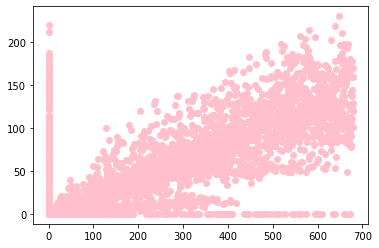

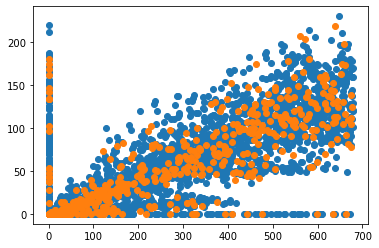

In [36]:
df_reg = df[['ghi', 'power']][df['ghi'].between(df['ghi'].quantile(0.1), df['ghi'].quantile(0.9))]
#df_auto_reg = df_auto[['bore', 'highway-mpg']]
X = df_reg['ghi']
y = df_reg['power']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

plt.scatter(X,y, color = 'pink')
plt.show()

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()


Coefficients: 
 [[0.36756106]]


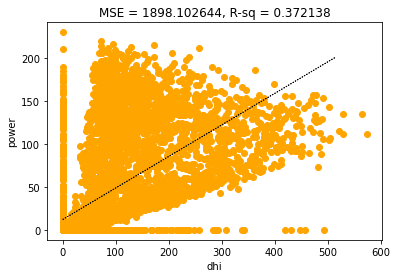

Coefficients: 
 [[0.32992918]]


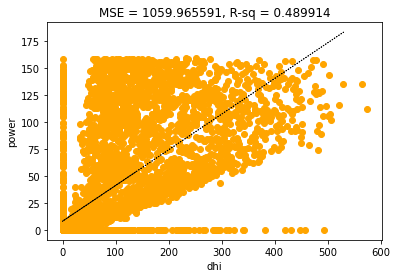

Coefficients: 
 [[0.2958301]]


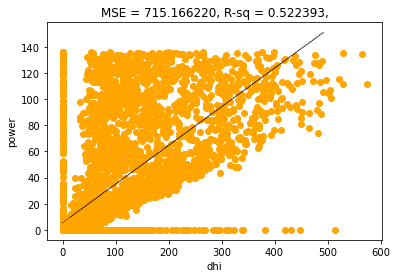

In [37]:
#considering outliers
df_reg10 = df[['dhi','power']]
X = df_reg10['dhi']
y = df_reg10['power']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat10 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('MSE = %f, R-sq = %f' %tuple(reg_stat10))
plt.scatter(X_train, y_train,  color='orange')
plt.plot(X_test, y_pred, color='black', linestyle='dotted', linewidth=1)
plt.xlabel('dhi')
plt.ylabel('power')
plt.show()

#considering between 5th and 95th percentile
df_reg11 = df[['dhi','power']][df['power'].between(df['power'].quantile(0.05), df['power'].quantile(0.95))]
X = df_reg11['dhi']
y = df_reg11['power']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat11 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('MSE = %f, R-sq = %f' %tuple(reg_stat11))
plt.scatter(X_train, y_train,  color='orange')
plt.plot(X_test, y_pred, color='black', linestyle='dotted', linewidth=1)
plt.xlabel('dhi')
plt.ylabel('power')
plt.show()

#considering between 20th and 80th percentile
df_reg12 = df[['dhi','power']][df['power'].between(df['power'].quantile(0.10), df['power'].quantile(0.90))]
X = df_reg12['dhi']
y = df_reg12['power']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat12 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('MSE = %f, R-sq = %f,' %tuple(reg_stat12))
plt.scatter(X_train, y_train,  color='orange')
plt.plot(X_test, y_pred, color='black', linestyle='dotted', linewidth=1)
plt.xlabel('dhi')
plt.ylabel('power')
plt.show()



Coefficients: 
 [[-0.00573965]]


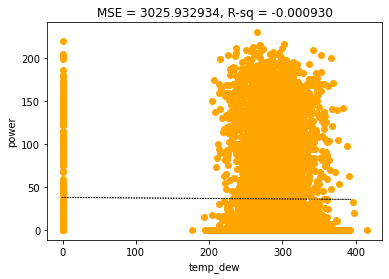

Coefficients: 
 [[0.00398299]]


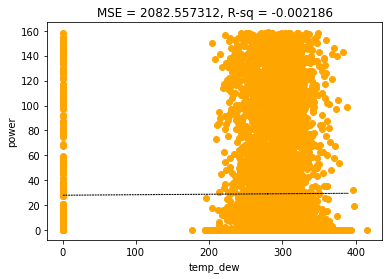

Coefficients: 
 [[0.00920044]]


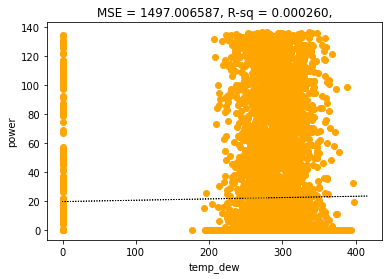

In [38]:





#considering outliers
df_reg10 = df[['temp_dew','power']]
X = df_reg10['temp_dew']
y = df_reg10['power']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat10 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('MSE = %f, R-sq = %f' %tuple(reg_stat10))
plt.scatter(X_train, y_train,  color='orange')
plt.plot(X_test, y_pred, color='black', linestyle='dotted', linewidth=1)
plt.xlabel('temp_dew')
plt.ylabel('power')
plt.show()

#considering between 5th and 95th percentile
df_reg11 = df[['temp_dew','power']][df['power'].between(df['power'].quantile(0.05), df['power'].quantile(0.95))]
X = df_reg11['temp_dew']
y = df_reg11['power']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat11 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('MSE = %f, R-sq = %f' %tuple(reg_stat11))
plt.scatter(X_train, y_train,  color='orange')
plt.plot(X_test, y_pred, color='black', linestyle='dotted', linewidth=1)
plt.xlabel('temp_dew')
plt.ylabel('power')
plt.show()

#considering between 20th and 80th percentile
df_reg12 = df[['temp_dew','power']][df['power'].between(df['power'].quantile(0.10), df['power'].quantile(0.90))]
X = df_reg12['temp_dew']
y = df_reg12['power']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat12 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('MSE = %f, R-sq = %f,' %tuple(reg_stat12))
plt.scatter(X_train, y_train,  color='orange')
plt.plot(X_test, y_pred, color='black', linestyle='dotted', linewidth=1)
plt.xlabel('temp_dew')
plt.ylabel('power')
plt.show()
